# Linear Regression - Auto Insurance in Sweden

This is a simple example of linear regression in the context of machine learning, using the "Auto Insurance in Sweden" dataset. The dataset is really simple, with 1 target variable and 1 feature variable. These are:
* **claims:** The number of claims made;
* **payment:** Total payment for all the claims in thousands of Swedish Kronor.

**obs:** The goal here is to show some simple concepts of machine learning using linear regression (and Python). Do not expect verification of theorical assumptions, residues analysis etc.

In [1]:
#Initial Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
#Importing the data and looking at the variables
df = pd.read_table('C:/Users/Eduardo/Documents/Acadêmicos/Bases de Dados/Auto Insurance in Sweden.txt', decimal = ',')
df.head()

,claims,payment
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [3]:
#Verifying for null values
df.isnull().sum()

claims     0
payment    0
dtype: int64

## Exploratory Data Analysis

In [4]:
#dimensions of the dataset
df.shape

(63, 2)

We got 63 samples and 2 variables (1 target, 1 feature)

In [5]:
#A summary of the dataset
df.describe()

,claims,payment
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


Some conclusions dropped by the describe method above were:
* The calculated means from 'claims' and 'payment' were 22.9 and 98.19, respectively;
* 25% of the claims and the payments were below 7.5 and 38.85, respectively;
* Half of the claims and the payments were below 14 and 73.4, respectively;
* The 25% highest values of claims and payments were above 29 and 140, respectively;
* The highest value of claims was 124, and the highest value of payment was 422.20.

By the nature of the variables, it is reasonable to considerer a positive linear relation between them. We can see this more precisely looking at the scatter plot below:

Text(0, 0.5, 'payment')

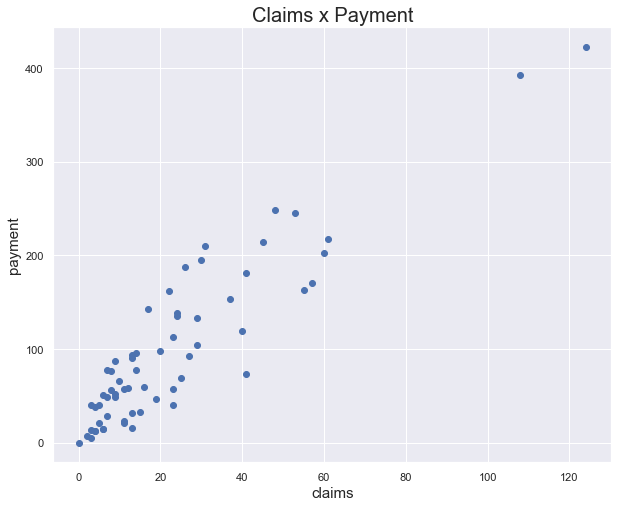

In [6]:
fig, ax = plt.subplots(1, 1, figsize = (10, 8))

ax.scatter(df.claims, df.payment)
ax.set_title("Claims x Payment", fontsize = 20)
ax.set_xlabel("claims", fontsize = 15)
ax.set_ylabel("payment", fontsize = 15)

We can see that there is a concentration of points relatively linear distributed on the first half of the x-axis. The correlation between the two variables are:

In [7]:
from scipy.stats import pearsonr
r, pvalue = pearsonr(df.claims, df.payment)
print("The calculated correlation was {}, with a pvalue of {}".format(r, pvalue))

The calculated correlation was 0.9128782350234067, with a pvalue of 2.046637844952289e-25


The Pearson coefficient of correlation showed us that there is a strong linear correlation between the variables.

## Linear Regression Model

Here we decided to fit the intercept to the model, however the best way to decide how to use the hyperparameters of each model is through research, where we can use tools like grid search to maximize the results.

In order to obtain more accurate results, usually the holdout or cross validation methods can be used. The holdout method is based on the division of the data set in 2 sets: the training set and the test set. It is not advisible to train and test the models on the same data, because in doing so, we are biasing the results making the model predict on data already known by it. Using the splitted data we are able to train the model on the training set (usually 75% or 80% of the data) and then make predictions on the test set (unknown by the model), in order to see the power of generalization of the model.

**Obs:** The Cross-Validation method is a generalization of the holdout method. It is also based on the splitting of the data, however it occours multiple times (usually 5 or 10), considering different schemes of splitting each time, so at the end of the process we can calculate the mean of the performance metrics, minimizing the variation of the results. This method is preferable to the holdout

To train our linear model, we can use sci-kit learn tools such as the LinearRegression class and the 'train_test_split' method:

### Fitting and Predicting

In [8]:
#Instanciating process
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression(fit_intercept = True)

In [9]:
#spliting the data set to use the holdout technique
Xtrain, Xtest, ytrain, ytest = train_test_split(df.claims[:, np.newaxis], df.payment, train_size = 0.75, random_state=97)

In [10]:
#training the model and making predictions
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print(ypred)

[111.89088697  69.33120353  66.05738172  39.86680729 180.64114485
  56.23591631  75.87884713  49.6882727   23.49769827 377.07045308
 121.71235239 223.2008283   98.79559976  66.05738172  52.96209451
  36.59298549]


In [11]:
#Comparing the real values to the predicted values
ytest.reset_index(drop = True, inplace = True)
ypred = pd.Series(ypred)
pd.Series(ypred).reset_index(drop=True, inplace = True)
pd.concat([ytest.rename("Observed"), ypred.rename("Predicted")], axis=1)

,Observed,Predicted
0,92.6,111.890887
1,95.5,69.331204
2,15.7,66.057382
3,40.3,39.866807
4,248.1,180.641145
5,65.3,56.235916
6,59.6,75.878847
7,55.6,49.688273
8,0.0,23.497698
9,392.5,377.070453


### Goodness of Fit

The simplest way to see how good the model performed is through visualization. Plotting the observed values by the predicted values, if the model was well fitted, we expect the points to be linearly distributed. Let's see:

Text(0, 0.5, 'Observed Values')

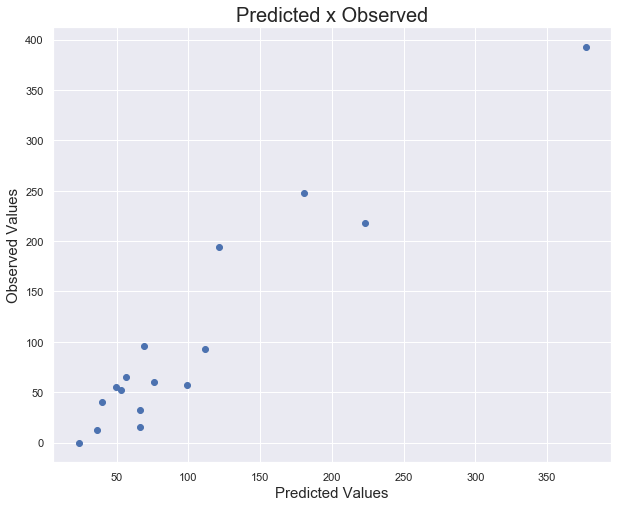

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
ax.scatter(ypred, ytest)
ax.set_title("Predicted x Observed", fontsize = 20)
ax.set_xlabel("Predicted Values", fontsize = 15)
ax.set_ylabel("Observed Values", fontsize = 15)

In [13]:
#The coefficients of the model
print("The coefficient estimated for claims was:{}".format(model.coef_[0]))
print("The intercept estimated was:{}".format(model.intercept_))

The coefficient estimated for claims was:3.2738218037150455
The intercept estimated was:23.497698274134933


From this estimated values, we conclude that:
* If the total of claims were zero, the mean value of payment would be 23.5;
* Increasing 1 claim increases the mean value of payment by 3.27.

#### Scores of Performance

##### Coefficient of Determination

In terms of linear regression, the coefficient of determination (R-squared) is the most known measure to evaluate the model. This score is based on how much variation of the target variable can be explained by the features (explanatory variables). 

The R-squared of our model says that about 80% of the variation of payments can be explained by the claims, as we can see below:

In [14]:
#R-squared
model.score(Xtrain, ytrain)

0.7958319420983757

##### Root Mean Squared Error and Mean Absolute Error

These are two frequently used scores for analyze models and both are very similar. The big difference between them is that RMSE is based on the squared errors, while the MAE is based on the absolute value of the errors. Below, we can see the RMSE and MAE for our model:

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("The Root Mean Squared Error of the model was:{}".format(np.sqrt(mean_squared_error(ytest, ypred))))
print("The Mean Absolute Error of the model was:{}".format(mean_absolute_error(ytest, ypred)))

The Root Mean Squared Error of the model was:33.67473101591244
The Mean Absolute Error of the model was:25.824222108532012


##### RMSE and MAE (Cross-validation)

As said before, the cross-validation method is used to reduce the variance of the score functions applied to the model. using the cross_val_score method from sci-kit learn, we can take a look at the mean of RMSE from a 10-folds procedure:

In [16]:
from sklearn.model_selection import cross_val_score

print(np.sqrt(-cross_val_score(model, df.claims[:, np.newaxis], df.payment, cv = 10,
               scoring = 'neg_mean_squared_error')).mean())

print(-cross_val_score(model, df.claims[:, np.newaxis], df.payment, cv = 10,
               scoring = 'neg_mean_absolute_error').mean())

35.63417900629122
30.69747735521605


We can see that the mean of RMSE from a 10-fold cross-validation is a bit higher than the result found considering the holdout.

#### Learning Curve

The learning curve is a tool to investigate what happens to the performance score of the model if we add more training samples, and to verify the contrast between variance and bias. Using sci-kit learn, we can build a learning curve in the following way:

[learning_curve] Training set sizes: [ 1  2  4  6  8 10 12 13 15 17 19 21 23 25 27 29 31 33 34 36 38 40 42 44
 46 48 50 52 54 56]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.3s finished


Text(0, 0.5, 'Root Mean Squared Error')

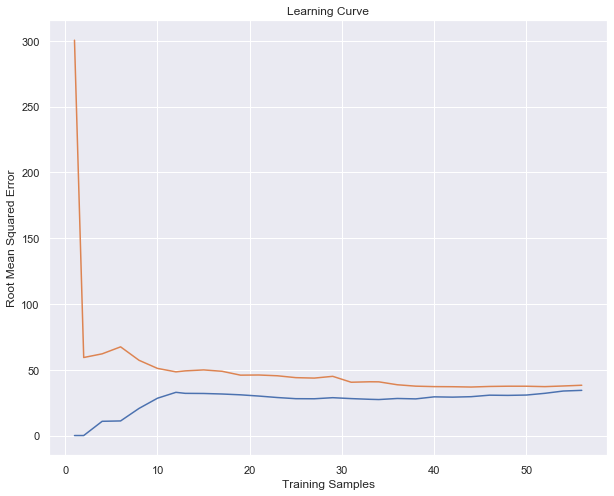

In [17]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, 
                                                       df.claims[:, np.newaxis], df.payment, cv = 10,
                                                       train_sizes = np.linspace(0.01, 1, 30),
                                                       scoring = 'neg_mean_squared_error', verbose = 1)

#print(train_sizes)
#print(np.sqrt(-train_scores))
#print(np.sqrt(-test_scores))

train_mean = np.sqrt(-np.mean(train_scores, axis =1))
test_mean = np.sqrt(-np.mean(test_scores, axis = 1))

#Graphics
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
ax.plot(train_sizes, train_mean)
ax.plot(train_sizes, test_mean)
ax.set_title("Learning Curve")
ax.set_xlabel("Training Samples")
ax.set_ylabel("Root Mean Squared Error")

We can see from the plot that the RMSE of the test set starts at something about 300, but it decrease as the amount of training samples increases, getting closer and closer to the training curve. Sometimes it is not possible to collect or use a big amount of data, so the learning curve can be used to decide a "good" and possible number of training samples.